## 1. Using Networks

network ~ graph



"import xxxxx as xx" is a common way to use widely-used Python libraries. By importing this way, we can use any of the library's classes and functions by prepending the name of the class or function with:



In [165]:
!pip3 install networkx
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import random
from random import randint
import pandas as pd
import itertools
import re


%matplotlib inline
# Using random seed helps to produce same network 

random.seed(42)     
   

Networkx has extensive documention with many examples (https://networkx.org/documentation/stable/index.html#) You can check this documentation page and search for the keywords. There is also an official tutorial for networkx, (https://networkx.org/documentation/stable/tutorial.html) it is the best place to learn about the basic usage of networkx library.

Let's start by making a simple undirected graph by hand:

In [14]:
G = nx.Graph()

By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [ ]:
# Creates an instance of a networkx graph.
my_first_graph = nx.Graph() 

# Lets add some nodes to the graph
my_first_graph.add_node(1)
my_first_graph.add_node(2)
my_first_graph.add_node(3)

# Now lets add some connections
my_first_graph.add_edge(1, 2)
my_first_graph.add_edge(3, 2)

We now have our first graph, which contains 3 nodes and 2 edges. We can look at it too by using draw() function. By the way, depending on the environment, you may have to import matplotlib first (see the networkx tutorial).

Networkx is underpowered for network visualization and it is rarely used for any serious network visualization. However, it has basic visualization capacity that is perfectly adequate for examining small networks.

In [30]:
# You can also add nodes and edges together

G.add_nodes_from(["1", "2", "3"])
G.add_edges_from([("1", "2"), ("3", "2")])

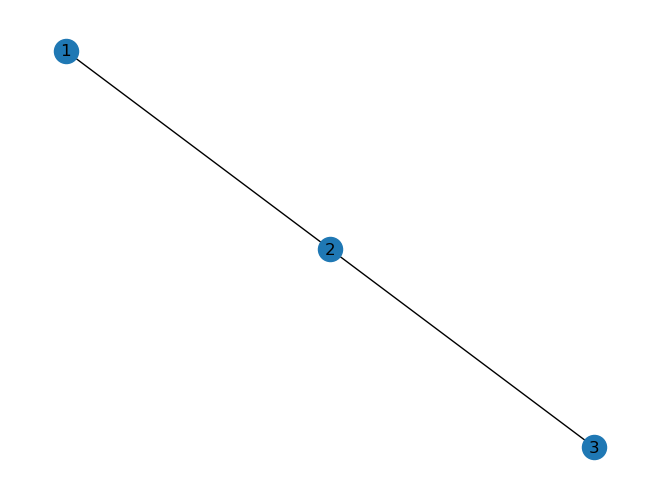

In [31]:
nx.draw(my_first_graph, with_labels=True)


In [ ]:
# len function gives the number of nodes in a network

len(G)

# We can also look at the neighbors of a node.
my_first_graph[2]

# You can check the neighbors this way:
# Let's check node 2's neighbors
print([node for node in my_first_graph.neighbors(2)])



[1, 3]


In [29]:
# You can also check the number of neighbors:

# Lets get all the neighbors for each node in the graph
for node in my_first_graph.nodes():
    print("Node", node, "'s neighbors:", set(my_first_graph.neighbors(node)))

Node 1 's neighbors: {2}
Node 2 's neighbors: {1, 3}
Node 3 's neighbors: {2}


## 2. Types of Networks

### 2.1. Directed Graphs

In [42]:
MG = nx.MultiGraph() #the above graphs are multigraphs

#But we can have directed graphs as well.
DG = nx.DiGraph()



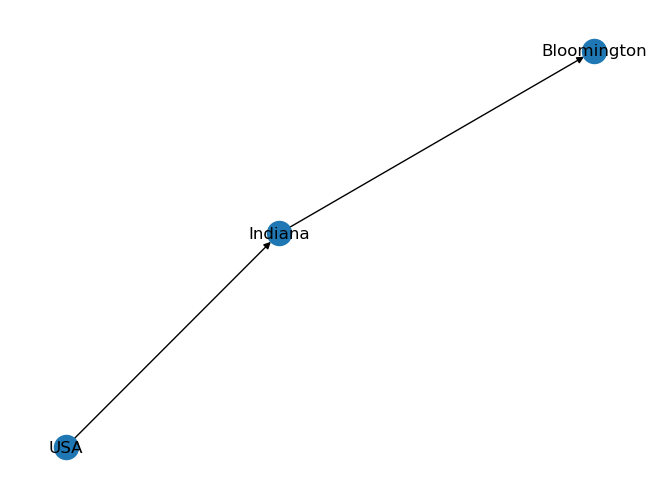

In [43]:
DG.add_nodes_from(["USA", "Indiana", "Bloomington"])
DG.add_edges_from([("USA", "Indiana"), ("Indiana", "Bloomington")])
nx.draw(DG, with_labels=True)

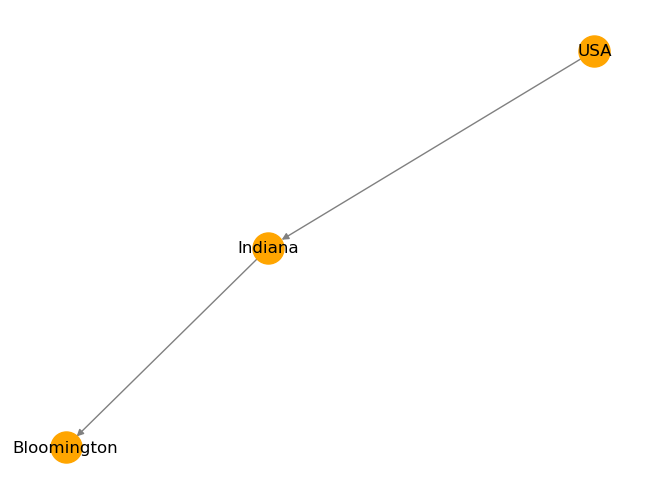

In [ ]:
# Customize the graph colors, size of the nodes

pos = nx.spring_layout(DG)
nx.draw(DG, pos, with_labels=True, node_size=500, node_color="orange", edge_color="gray")
plt.show()

## 3. Network Features


### 3.1. Create our network

In [142]:
names = [
    "Milojevic, Stasa",
    "An, Juyoung",
    "Asad, Abdul Moeed",
    "Blundell Osorio, Melissa",
    "Chen, Daoxin",
    "Du, Nachuan",
    "Fashir, Mustafa",
    "Golden, Oliver",
    "Khan, Noverah",
    "Li, Feng",
    "Luby, Paean",
    "McNames, Megan",
    "Parameswaran, Aarathi",
    "Peng, Xinran",
    "Risch, Fairman",
    "Rosen, Ari",
    "Saavedra, Belen",
    "Shan, Cloris",
    "Tang, Xiaoyue",
    "Tarannum, Aanila Kishwar",
    "Yu, Changhong",
    "Zhang, Xinyun",
    "Zhou, Shirui",
    "Zhu, Renee",
    "Otenen, Ege"
]

         start_node                  end_node
0  Milojevic, Stasa         Asad, Abdul Moeed
1  Milojevic, Stasa  Blundell Osorio, Melissa
2  Milojevic, Stasa           Fashir, Mustafa
3  Milojevic, Stasa            McNames, Megan
4  Milojevic, Stasa           Saavedra, Belen
5  Milojevic, Stasa              Shan, Cloris
6  Milojevic, Stasa              Zhou, Shirui
7       An, Juyoung         Asad, Abdul Moeed
8       An, Juyoung     Parameswaran, Aarathi
9       An, Juyoung                Rosen, Ari

Nodes: 25  Edges: 53

Top degrees:
Asad, Abdul Moeed           8
Milojevic, Stasa            7
Blundell Osorio, Melissa    7
Fashir, Mustafa             6
Tarannum, Aanila Kishwar    6
Rosen, Ari                  6
Parameswaran, Aarathi       6
Zhou, Shirui                5
Shan, Cloris                5
Saavedra, Belen             4
dtype: int64


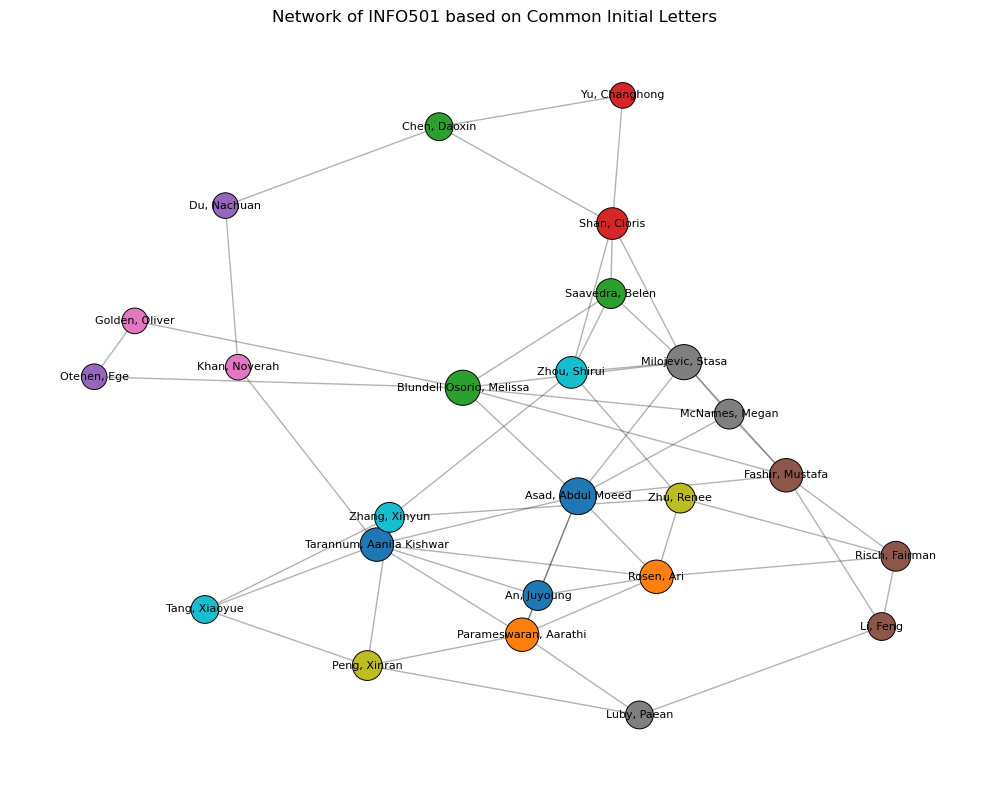


Initials + degree summary:
                         initials  degree
Asad, Abdul Moeed              AM       8
Milojevic, Stasa               MS       7
Blundell Osorio, Melissa      BMO       7
Fashir, Mustafa                FM       6
Tarannum, Aanila Kishwar      AKT       6
Rosen, Ari                     AR       6
Parameswaran, Aarathi          AP       6
Zhou, Shirui                   SZ       5
Shan, Cloris                   CS       5
Saavedra, Belen                BS       4
Zhang, Xinyun                  XZ       4
McNames, Megan                  M       4


In [ ]:
# Connect if ANY initial overlaps between two names
# (multi-word first/last supported; cross-matches allowed)
# ----------------------------------------------------------------
# Keep your imports, names list, and plotting code as-is

import re
import itertools
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- upgraded helpers ------------------------------------------------------

def initials_from_segment(seg: str) -> set[str]:
    """
    Return set of uppercase initials from a segment like:
    - 'Blundell Osorio' -> {'B','O'}
    - 'Aanila Kishwar'  -> {'A','K'}
    - Ignores non-letters and empty chunks.
    """
    words = re.findall(r"[A-Za-z]+", seg or "")
    return {w[0].upper() for w in words if w}

def parse_all_initials(full: str) -> set[str]:
    """
    Parse 'Last, First (extras...)' -> set of ALL initials across last+first.
    - Last: everything before first comma (may be multi-word)
    - First: everything after first comma; parentheses removed; may be multi-word
    """
    parts = [p.strip() for p in full.split(",", 1)]
    last_part  = parts[0] if parts else ""
    first_part = parts[1] if len(parts) > 1 else ""

    # Strip parentheses in first part
    first_part_clean = re.sub(r"\(.*?\)", "", first_part).strip()

    last_inits  = initials_from_segment(last_part)
    first_inits = initials_from_segment(first_part_clean)

    return last_inits | first_inits  # union of ALL initials

# Precompute initials set for everyone
ALL = {n: parse_all_initials(n) for n in names}  # {name: {'B','O',...}}

def should_connect(a: str, b: str) -> bool:
    """Edge if there is ANY shared initial between the two names."""
    return len(ALL[a] & ALL[b]) > 0

# --- build edgelist --------------------------------------------------------

edges = [(u, v) for u, v in itertools.combinations(names, 2) if should_connect(u, v)]

df = pd.DataFrame(edges, columns=["start_node", "end_node"])
print(df.head(10))
print(f"\nNodes: {len(names)}  Edges: {len(edges)}")
df.to_csv("name_any_initials_edgelist.csv", index=False)

# --- quick NetworkX analysis ----------------------------------------------

G = nx.Graph()
G.add_nodes_from(names)
G.add_edges_from(edges)

print("\nTop degrees:")
print(pd.Series(dict(G.degree())).sort_values(ascending=False).head(10))

# --- simple visualization --------------------------------------------------

# Color by a stable hash of the initials set (so similar names *may* share color)
def key_for_color(s: set[str]) -> str:
    return "".join(sorted(s)) or "?"

palette_keys = sorted({key_for_color(ALL[n]) for n in names})
palette = {k: i for i, k in enumerate(palette_keys)}

node_colors = [palette[key_for_color(ALL[n])] for n in G.nodes()]
node_sizes  = [220 + 60*G.degree(n) for n in G.nodes()]

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.tab10,
    edgecolors="black",
    linewidths=0.7
)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Network of INFO501 based on Common Initial Letters")
plt.axis("off")
plt.tight_layout()
plt.show()

# --- initial report --------------------------------------------------------

report = pd.DataFrame({
    "initials": {n: "".join(sorted(ALL[n])) for n in names},
    "degree": dict(G.degree())
}).sort_values("degree", ascending=False)

print("\nInitials + degree summary:")
print(report.head(12))



### 4. Examine Network Measures

4.1. Degree & Degree Centrality


Degree = number of connections a node has.

Degree centrality = degree normalized by the maximum possible degree.

In [90]:
deg = dict(G.degree())
deg_c = nx.degree_centrality(G)

print("Top degree nodes:")
print(pd.Series(deg).sort_values(ascending=False).head())

print("\nTop degree centrality:")
print(pd.Series(deg_c).sort_values(ascending=False).head())

Top degree nodes:
Asad, Abdul Moeed           8
Milojevic, Stasa            7
Blundell Osorio, Melissa    7
Fashir, Mustafa             6
Tarannum, Aanila Kishwar    6
dtype: int64

Top degree centrality:
Asad, Abdul Moeed           0.333333
Milojevic, Stasa            0.291667
Blundell Osorio, Melissa    0.291667
Fashir, Mustafa             0.250000
Tarannum, Aanila Kishwar    0.250000
dtype: float64


In [92]:
# What is your degree centrality?

print("Otenen, Ege:", deg_c["Otenen, Ege"])



Otenen, Ege: 0.08333333333333333


4.2.  Betweenness Centrality

Measures how often a node lies on shortest paths between others.

High betweenness → “broker” or “bridge” role.


In [95]:
bet_c = nx.betweenness_centrality(G)
print("\nTop betweenness:")
print(pd.Series(bet_c).sort_values(ascending=False).head())


Top betweenness:
Asad, Abdul Moeed           0.223671
Blundell Osorio, Melissa    0.177174
Milojevic, Stasa            0.165097
Shan, Cloris                0.160326
Tarannum, Aanila Kishwar    0.153382
dtype: float64


In [96]:
# What is your betweenness centrality?

print("Otenen, Ege:", bet_c["Otenen, Ege"])



Otenen, Ege: 0.0


4.3.  Closeness Centrality

How close a node is to all others (average shortest path distance).

High closeness → node can quickly reach everyone else.


In [ ]:
clo_c = nx.closeness_centrality(G)
print("\nTop closeness:")

print(pd.Series(clo_c).sort_values(ascending=False).head())


Top closeness:
Asad, Abdul Moeed           0.545455
Milojevic, Stasa            0.521739
Fashir, Mustafa             0.480000
Blundell Osorio, Melissa    0.470588
Tarannum, Aanila Kishwar    0.470588
dtype: float64


In [102]:
# What is your closeness centrality?

print("Otenen, Ege:", clo_c["Otenen, Ege"])



Otenen, Ege: 0.3287671232876712


4.4. Eigenvector Centrality

Measures influence: a node is important if connected to other important nodes.


In [99]:
eig_c = nx.eigenvector_centrality(G, max_iter=1000)
print("\nTop eigenvector centrality:")
print(pd.Series(eig_c).sort_values(ascending=False).head())


Top eigenvector centrality:
Asad, Abdul Moeed           0.424076
Milojevic, Stasa            0.342536
Blundell Osorio, Melissa    0.315798
Fashir, Mustafa             0.303834
Rosen, Ari                  0.274214
dtype: float64


In [101]:
# What is your eigenvector centrality?

print("Otenen, Ege:", eig_c["Otenen, Ege"])



Otenen, Ege: 0.07387997265092724


4.5. Clustering Coefficient

How tightly knit neighbors are (probability neighbors are connected).


In [104]:
avg_clust = nx.average_clustering(G)

print(f"\nAverage clustering coefficient: {avg_clust:.3f}")

clust = nx.clustering(G)
print("Top clustering values:")
print(pd.Series(clust).sort_values(ascending=False).head())


Average clustering coefficient: 0.489
Top clustering values:
Otenen, Ege       1.0
Golden, Oliver    1.0
Yu, Changhong     1.0
An, Juyoung       1.0
McNames, Megan    1.0
dtype: float64


4.6. Shortest Paths & Diameter

Diameter = longest shortest path in the graph.

Average path length = how many steps on average to reach another node.


In [105]:
if nx.is_connected(G):
    diam = nx.diameter(G)
    avg_path = nx.average_shortest_path_length(G)
    print(f"\nDiameter: {diam}, Average path length: {avg_path:.3f}")


Diameter: 5, Average path length: 2.480


4.7. Community Detection

In [113]:
from networkx.algorithms.community import greedy_modularity_communities

comms = list(greedy_modularity_communities(G))
print(f"\nDetected {len(comms)} communities:")
for i, c in enumerate(comms):
    print(f"Community {i+1} (size {len(c)}): {c}")


Detected 4 communities:
Community 1 (size 8): frozenset({'Saavedra, Belen', 'Zhou, Shirui', 'Khan, Noverah', 'Du, Nachuan', 'Yu, Changhong', 'Shan, Cloris', 'Chen, Daoxin', 'Milojevic, Stasa'})
Community 2 (size 7): frozenset({'Rosen, Ari', 'Risch, Fairman', 'Tarannum, Aanila Kishwar', 'Parameswaran, Aarathi', 'Zhu, Renee', 'Asad, Abdul Moeed', 'An, Juyoung'})
Community 3 (size 5): frozenset({'Zhang, Xinyun', 'Peng, Xinran', 'Tang, Xiaoyue', 'Li, Feng', 'Luby, Paean'})
Community 4 (size 5): frozenset({'Otenen, Ege', 'Golden, Oliver', 'Blundell Osorio, Melissa', 'McNames, Megan', 'Fashir, Mustafa'})


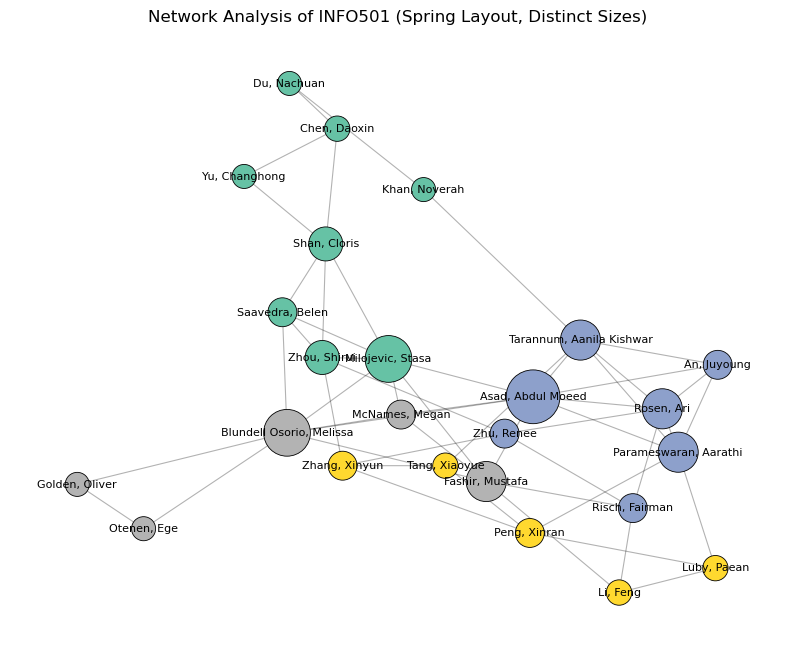

In [ ]:
# Degree + community color
deg = dict(G.degree())

# Nonlinear scaling for more visual separation
deg_values = np.array(list(deg.values()))
min_deg, max_deg = deg_values.min(), deg_values.max()


node_sizes = []
for n in G.nodes():
    norm = (deg[n] - min_deg) / (max_deg - min_deg + 1e-6)
    size = 300 + 1200 * (norm ** 2)   # quadratic scaling
    node_sizes.append(size)

node_colors = [sum([i for i, c in enumerate(comms) if n in c]) for n in G.nodes()]

# Layout
pos = nx.spring_layout(G, seed=42, k=0.6)

# Draw
plt.figure(figsize=(10,8))
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.8)
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.Set2,
    edgecolors="black",
    linewidths=0.6
)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Network Analysis of INFO501 (Spring Layout, Distinct Sizes)")
plt.axis("off")
plt.show()


In [125]:
# Calculate density
density = nx.density(G)
print(f"Network density: {density:.3f}")


Network density: 0.177


### 5. Weighted Graph

Randomly connect the nodes and see how density changes?

Edges with weights:
[('Milojevic, Stasa', 'Parameswaran, Aarathi', {'weight': 7}), ('An, Juyoung', 'Blundell Osorio, Melissa', {'weight': 2}), ('An, Juyoung', 'Risch, Fairman', {'weight': 10}), ('An, Juyoung', 'Shan, Cloris', {'weight': 3}), ('An, Juyoung', 'Tang, Xiaoyue', {'weight': 4}), ('An, Juyoung', 'Zhu, Renee', {'weight': 2}), ('Asad, Abdul Moeed', 'Blundell Osorio, Melissa', {'weight': 4}), ('Asad, Abdul Moeed', 'Du, Nachuan', {'weight': 0}), ('Asad, Abdul Moeed', 'Khan, Noverah', {'weight': 1}), ('Asad, Abdul Moeed', 'McNames, Megan', {'weight': 6}), ('Asad, Abdul Moeed', 'Zhang, Xinyun', {'weight': 10}), ('Blundell Osorio, Melissa', 'Golden, Oliver', {'weight': 5}), ('Blundell Osorio, Melissa', 'Risch, Fairman', {'weight': 2}), ('Blundell Osorio, Melissa', 'Tarannum, Aanila Kishwar', {'weight': 8}), ('Chen, Daoxin', 'McNames, Megan', {'weight': 9}), ('Chen, Daoxin', 'Parameswaran, Aarathi', {'weight': 10}), ('Chen, Daoxin', 'Risch, Fairman', {'weight': 10}), ('Chen, Daoxin',

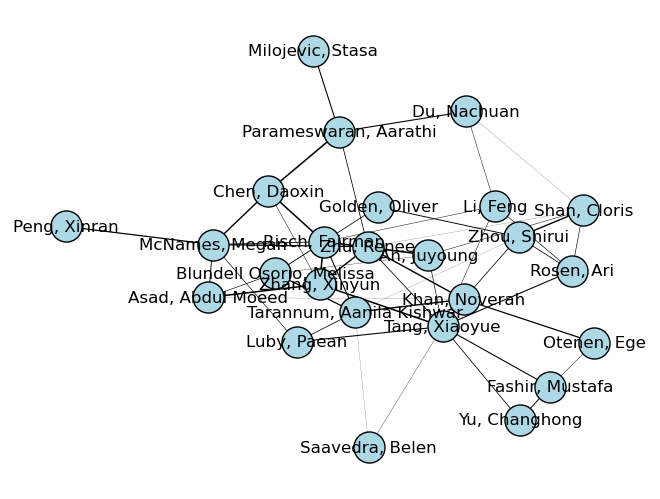

Network density: 0.190


In [162]:
import itertools, random, networkx as nx, matplotlib.pyplot as plt, pandas as pd

# Suppose you have a list of nodes

# Initialize graph and add nodes
G = nx.Graph()
G.add_nodes_from(names)


# Randomly create edges between pairs of nodes
edges = []
for u, v in itertools.combinations(names, 2):   # all possible pairs
    if random.random() < 0.2:  # 20% chance to create an edge
        w = random.randint(0, 10)  # random weight between 1–10
        edges.append((u, v, {"weight": w}))

# Add edges to graph
G.add_edges_from(edges)

# Inspect
print("Edges with weights:")
print(G.edges(data=True))

# --- Optional: Save as CSV (edge list format) ---
df = pd.DataFrame([(u,v,d["weight"]) for u,v,d in G.edges(data=True)],
                  columns=["source","target","weight"])
df.to_csv("random_weighted_edges.csv", index=False)
print("\nEdge list CSV format:\n", df.head())

# --- Visualization ---
pos = nx.spring_layout(G, seed=42, weight="weight")
nx.draw(G, pos,
        with_labels=True,
        node_size=500,
        node_color="lightblue",
        edgecolors="black",
        width=[d["weight"]/9 for _,_,d in G.edges(data=True)])
plt.show()

density = nx.density(G)
print(f"Network density: {density:.3f}")


Edges with weights:
[('Milojevic, Stasa', 'Asad, Abdul Moeed', {'weight': 3}), ('Milojevic, Stasa', 'Du, Nachuan', {'weight': 0}), ('Milojevic, Stasa', 'Fashir, Mustafa', {'weight': 8}), ('Milojevic, Stasa', 'Khan, Noverah', {'weight': 6}), ('Milojevic, Stasa', 'Li, Feng', {'weight': 3}), ('Milojevic, Stasa', 'Parameswaran, Aarathi', {'weight': 3}), ('Milojevic, Stasa', 'Peng, Xinran', {'weight': 6}), ('Milojevic, Stasa', 'Risch, Fairman', {'weight': 10}), ('Milojevic, Stasa', 'Rosen, Ari', {'weight': 4}), ('Milojevic, Stasa', 'Saavedra, Belen', {'weight': 6}), ('Milojevic, Stasa', 'Shan, Cloris', {'weight': 4}), ('Milojevic, Stasa', 'Tarannum, Aanila Kishwar', {'weight': 5}), ('Milojevic, Stasa', 'Yu, Changhong', {'weight': 5}), ('Milojevic, Stasa', 'Zhang, Xinyun', {'weight': 7}), ('Milojevic, Stasa', 'Zhou, Shirui', {'weight': 6}), ('Milojevic, Stasa', 'Zhu, Renee', {'weight': 9}), ('Milojevic, Stasa', 'Otenen, Ege', {'weight': 1}), ('An, Juyoung', 'Asad, Abdul Moeed', {'weight': 5}

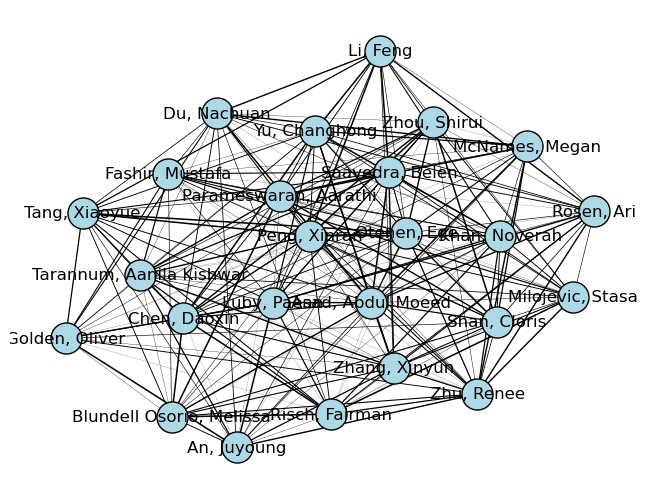

Network density: 0.800


In [163]:
# Initialize graph and add nodes
G = nx.Graph()
G.add_nodes_from(names)


# Randomly create edges between pairs of nodes
edges = []
for u, v in itertools.combinations(names, 2):   # all possible pairs
    if random.random() < 0.8:  # 80% chance to create an edge
        w = random.randint(0, 10)  # random weight between 1–10
        edges.append((u, v, {"weight": w}))

# Add edges to graph
G.add_edges_from(edges)

# Inspect
print("Edges with weights:")
print(G.edges(data=True))

# --- Optional: Save as CSV (edge list format) ---
df = pd.DataFrame([(u,v,d["weight"]) for u,v,d in G.edges(data=True)],
                  columns=["source","target","weight"])
df.to_csv("random_weighted_edges.csv", index=False)
print("\nEdge list CSV format:\n", df.head())

# --- Visualization ---
pos = nx.spring_layout(G, seed=42, weight="weight")
nx.draw(G, pos,
        with_labels=True,
        node_size=500,
        node_color="lightblue",
        edgecolors="black",
        width=[d["weight"]/9 for _,_,d in G.edges(data=True)])
plt.show()

density = nx.density(G)
print(f"Network density: {density:.3f}")


In [164]:
import networkx as nx

# Suppose G is a weighted graph

# Node strength
strength = dict(G.degree(weight="weight"))

# Weighted betweenness
bet_c = nx.betweenness_centrality(G, weight="weight")

# Weighted closeness
clo_c = nx.closeness_centrality(G, distance="weight")

# Average clustering (weighted)
clust = nx.average_clustering(G, weight="weight")

print("Top by strength:", sorted(strength.items(), key=lambda x: -x[1])[:5])
print("Top betweenness:", sorted(bet_c.items(), key=lambda x: -x[1])[:5])
print("Weighted clustering coeff:", clust)


Top by strength: [('Asad, Abdul Moeed', 137), ('Peng, Xinran', 123), ('Luby, Paean', 121), ('Chen, Daoxin', 115), ('Parameswaran, Aarathi', 115)]
Top betweenness: [('Zhang, Xinyun', 1.8452912951384703), ('Zhou, Shirui', 0.7571086324196906), ('Tang, Xiaoyue', 0.7552993189185502), ('Yu, Changhong', 0.4829143843747425), ('McNames, Megan', 0.4478741953508026)]
Weighted clustering coeff: 0.31010843602704424


In [157]:
comms = list(greedy_modularity_communities(G))
print(f"\nDetected {len(comms)} communities:")
for i, c in enumerate(comms):
    print(f"Community {i+1} (size {len(c)}): {c}")


Detected 3 communities:
Community 1 (size 9): frozenset({'Risch, Fairman', 'Du, Nachuan', 'Khan, Noverah', 'Yu, Changhong', 'Zhang, Xinyun', 'Peng, Xinran', 'Chen, Daoxin', 'Blundell Osorio, Melissa', 'Li, Feng'})
Community 2 (size 8): frozenset({'Shan, Cloris', 'Tang, Xiaoyue', 'Tarannum, Aanila Kishwar', 'Milojevic, Stasa', 'McNames, Megan', 'Luby, Paean', 'Asad, Abdul Moeed', 'Golden, Oliver'})
Community 3 (size 8): frozenset({'Otenen, Ege', 'Saavedra, Belen', 'Fashir, Mustafa', 'Zhou, Shirui', 'Zhu, Renee', 'Rosen, Ari', 'Parameswaran, Aarathi', 'An, Juyoung'})


1. Degree / Strength
👉 “In a school friendship network, which student is the most popular — the one who has the largest number of friends?”
Answer: Degree centrality (or strength if weighted).

2. Betweenness
👉 “In a company’s email network, which employee acts as a broker, controlling the communication between two departments that otherwise don’t talk much?”
Answer: Betweenness centrality.

3. Closeness
👉 “In a logistics network, which warehouse can deliver goods to all other warehouses the fastest, on average?”
Answer: Closeness centrality.

4. Eigenvector
👉 “On Twitter, which user is influential not just because they have many followers, but because their followers themselves are influential?”
Answer: Eigenvector centrality.

5. PageRank
👉 “When searching the web, which website is most likely to be visited by a random user who keeps clicking links at random?”
Answer: PageRank.

6. Clustering Coefficient (bonus, not centrality but related)
👉 “In a friendship network, which student’s friends are also all friends with each other, forming a tight clique?”

### . Import Facebook dataset

Moreover, as known, a facebook network is undirected and has no weights because one user can become friends with another user just once. Looking at the dataset from a graph analysis perspective:

** Each node represents an anonymized facebook user that belongs to one of those ten friends lists.
** Each edge corresponds to the friendship of two facebook users that belong to this network. In other words, two users must become friends on facebook in order for them to be connected in the particular network.

Note: Nodes are the ones whose friends list will be examined. That means that they are in the spotlight of this analysis. Those nodes are considered the 0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 39380

In [ ]:
facebook = pd.read_csv(
    # Dataset from the SNAP database
    "https://snap.stanford.edu/data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)

#The edges are loaded from the data folder and saved in a dataframe. 
# Each edge is a new row and for each edge there is a start_node and an end_node column



,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [ ]:
# Build the network
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

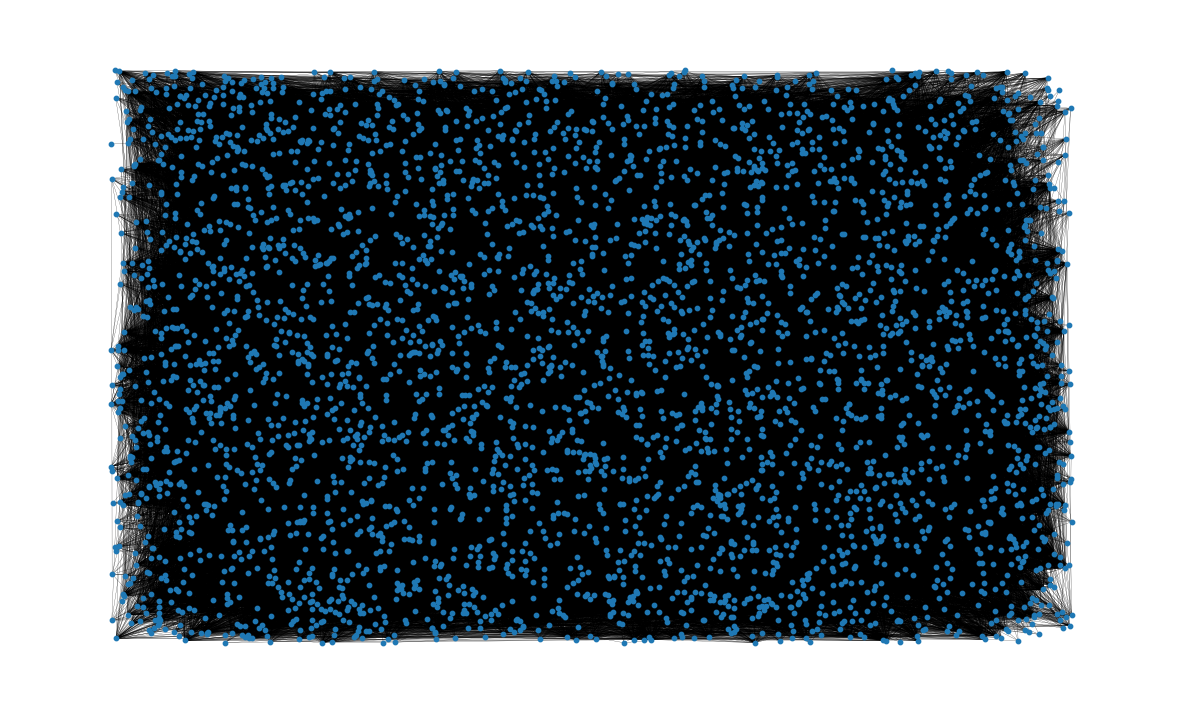

In [52]:
# Visualize the network
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)


        start_node                  end_node
0  Stasa Milojevic         Asad, Abdul Moeed
1  Stasa Milojevic  Blundell Osorio, Melissa
2  Stasa Milojevic           Fashir, Mustafa
3  Stasa Milojevic            McNames, Megan
4  Stasa Milojevic           Saavedra, Belen
5  Stasa Milojevic              Shan, Cloris
6  Stasa Milojevic              Zhou, Shirui
7      An, Juyoung         Asad, Abdul Moeed
8      An, Juyoung     Parameswaran, Aarathi
9      An, Juyoung                Rosen, Ari

Nodes: 25  Edges: 53

Top degrees:
Asad, Abdul Moeed           8
Stasa Milojevic             7
Blundell Osorio, Melissa    7
Fashir, Mustafa             6
Tarannum, Aanila Kishwar    6
Rosen, Ari                  6
Parameswaran, Aarathi       6
Zhou, Shirui                5
Shan, Cloris                5
Saavedra, Belen             4
dtype: int64


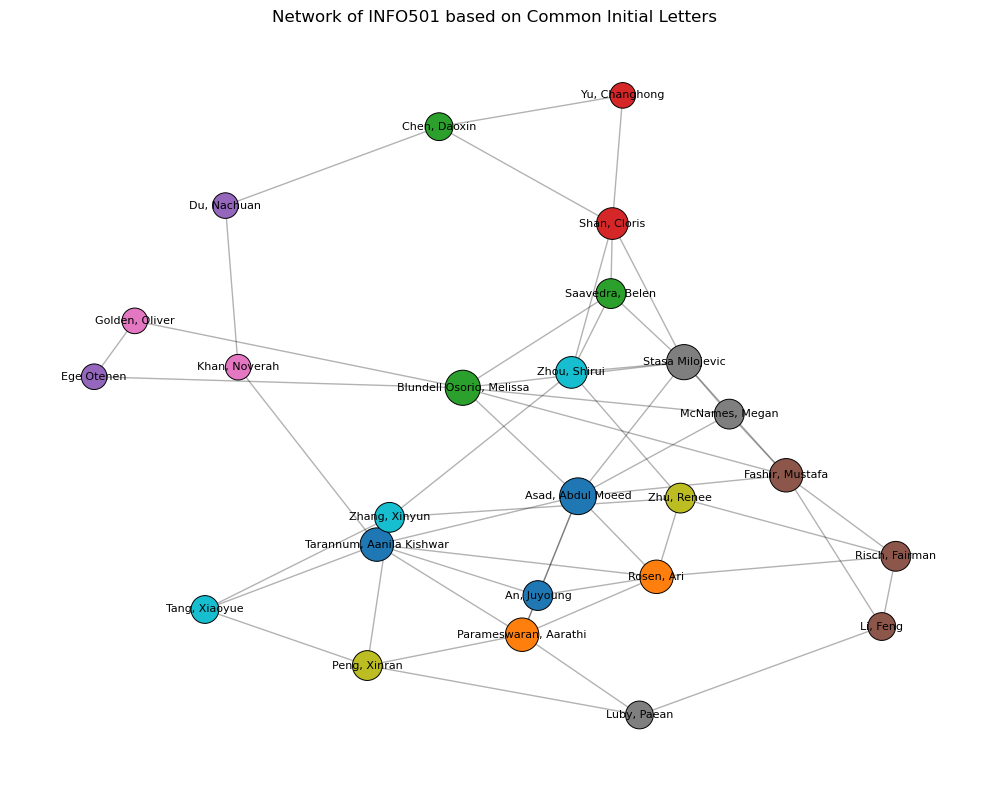


Initials + degree summary:
                         initials  degree
Asad, Abdul Moeed              AM       8
Stasa Milojevic                MS       7
Blundell Osorio, Melissa      BMO       7
Fashir, Mustafa                FM       6
Tarannum, Aanila Kishwar      AKT       6
Rosen, Ari                     AR       6
Parameswaran, Aarathi          AP       6
Zhou, Shirui                   SZ       5
Shan, Cloris                   CS       5
Saavedra, Belen                BS       4
Zhang, Xinyun                  XZ       4
McNames, Megan                  M       4


In [ ]:
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    print(f"{node} (degree {len(neighbors)})")
    #print(f"{node} (degree {len(neighbors)}) -> {neighbors}") --see neighbors

Stasa Milojevic (degree 7)
An, Juyoung (degree 4)
Asad, Abdul Moeed (degree 8)
Blundell Osorio, Melissa (degree 7)
Chen, Daoxin (degree 3)
Du, Nachuan (degree 2)
Fashir, Mustafa (degree 6)
Golden, Oliver (degree 2)
Khan, Noverah (degree 2)
Li, Feng (degree 3)
Luby, Paean (degree 3)
McNames, Megan (degree 4)
Parameswaran, Aarathi (degree 6)
Peng, Xinran (degree 4)
Risch, Fairman (degree 4)
Rosen, Ari (degree 6)
Saavedra, Belen (degree 4)
Shan, Cloris (degree 5)
Tang, Xiaoyue (degree 3)
Tarannum, Aanila Kishwar (degree 6)
Yu, Changhong (degree 2)
Zhang, Xinyun (degree 4)
Zhou, Shirui (degree 5)
Zhu, Renee (degree 4)
Ege Otenen (degree 2)


In [75]:
path = nx.shortest_path(G, "Golden, Oliver",
    "Khan, Noverah",)

length = nx.shortest_path_length(G, source="Golden, Oliver", target="Khan, Noverah")
print(f"Shortest path: {path}, Length: {length}")


Shortest path: ['Golden, Oliver', 'Blundell Osorio, Melissa', 'Asad, Abdul Moeed', 'Tarannum, Aanila Kishwar', 'Khan, Noverah'], Length: 4
